# Homework 2

# Part 1: Expected Prediction Risk (EPR) 

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset. 

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

We can start by rewriting the EPR and expanding it:

$$
\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2] \, = \,  \mathbb{E}_{X,Y}[Y^2 - 2Yf(X) + f(X)^2 ] = 
\\[5mm]
\\[5mm]
= \sum_{i=1}^{N}\sum_{j=1}^{N} y_{j}^2 p(x_{i}, y_{j}) \, - \, 2\sum_{i=1}^{N}\sum_{j=1}^{N} y_{j} f(x_{i}) p(x_{i}, y_{j}) \, + \, \sum_{i=1}^{N}\sum_{j=1}^{N} f(x_{i})^2p(x_{i}, y_{j}) =
\\[5mm]
$$
Bayes formula states that:
$$
p(x,y) \, = \, p(x)p(y|x)
$$
Then we can rewrite the second sum as:
$$
\sum_{i=1}^{N}\sum_{j=1}^{N} y_{j}^2 p(x_{i}, y_{j}) \, - \, 2\sum_{i=1}^{N}\sum_{j=1}^{N} y_{j} f(x_{i}) p(x_{i})p(y_{j} | x_{i}) \, + \, \sum_{i=1}^{N}\sum_{j=1}^{N} f(x_{i})^2p(x_{i}, y_{j})
$$
And if in the second and third sums we bring out of the sum over y the terms that depend only on x we get:
$$
\sum_{x}\sum_{y} y^2 p(x, y) \, - \, 2\sum_{x} f(x) p(x)\sum_{y} y\, p(y | x) \, + \, \sum_{x}f(x)^2\sum_{y}p(x, y)
$$
We ca notice that $\sum_{y} y\, p(y | x)$ is the conditional mean of $Y$ given $X$ defined as $\mu_{Y|X}$.
Moreover, $\sum_{y}p(x, y) \, = \, p(x)$ as, summing over all $y$, we marginalize the random variable $Y$.
The result is:
$$
\sum_{x}\sum_{y} y^2 p(x, y) \, - \, 2\sum_{x} f(x) p(x)\mu_{Y|X} \, + \, \sum_{x}f(x)^2p(x) =
\\[5mm]
\sum_{x}\sum_{y} y^2 p(x, y) \, + \, \sum_{x} p(x)(f(x)^2 - 2f(x)\mu_{Y|X}) 
$$
To find the estimator $f(x)$ that minimizes the $EPR$ we need to minimiz the above expression with respect to $f(x)$, in formulae:
$$
f_{best}(x) \, = \, \argmin_{f(x)} EPR[f(x)] \, = \, \argmin_{f(x)} \sum_{x}\sum_{y} y^2 p(x, y) \, + \, \sum_{x} p(x)(f(x)^2 - 2f(x)\mu_{Y|X}) 
$$
The first sum $\sum_{x}\sum_{y} y^2 p(x, y)$ does not depend on $f(x)$ thus the problem reduces to:
$$
\argmin_{f(x)}  \sum_{x} p(x)(f(x)^2 - 2f(x)\mu_{Y|X})  
$$
Minimize the sum is equivalent to minimizing its argument and, as $p(x)(f(x)^2 - 2f(x)\mu_{Y|X})$ is a second degree equation in $f(x)$ we can minimize it by finding $f(x) : \frac{\delta}{\delta f(x)}p(x)(f(x)^2 - 2f(x)\mu_{Y|X}) \, = \, 0$
$$
\frac{\delta}{\delta f(x)}p(x)(f(x)^2 - 2f(x)\mu_{Y|X}) \, = \, p(x)(2f(x) - 2\mu_{Y|X}) \, = \,0
$$
We assume to consider only values of $x$ such that $p(x) > 0$, then the equation is minimized by $f(x) \, = \, \mu_{Y|X}$

The best estimator, i.e. the one that minimizes the expected prediction risk is:
$$f(x) \, = \, \sum_{y} y\, p(y | x) \, = \, \mu_{Y|X}$$
And the EPR becomes:
$$
\mathbb{E}_{X,Y}[(Y - \mu_{Y|X})^2]
$$
 


Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.

In the case of the classification problem, the EPR can be written as:
$$
EPR(\hat{c}(x)) \, = \, \mathbb{E}_{X,Y}[L(c, \hat{c}(x))]
$$
If we expand it we get:
$$
\sum_{x}\sum_{c}L(c, \hat{c}(x))p(x, c)
$$
Using again Bayes and brining out of the sum over $c$ the terms that depend only on $x$ we write:
$$
\sum_{x}\sum_{c}L(c, \hat{c}(x))p(x, c) \, = \, \sum_{x}p(x)\sum_{c}L(c, \hat{c}(x))p(c | x)
$$
The expression obtained can be seen as an expectation over $X$ of $\sum_{c}L(c, \hat{c}(x))p(c | x)$ so we can rewrite the EPR as:
$$
EPR[\hat{c}(x)] \, = \, \mathbb{E}_{X}\left[\sum_{c}L(c, \hat{c}(x))p(c | x)\right]
$$


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


Finding the optimial classifier means finding $\hat{c}(x)$ that minimizes the EPR, namely:
$$
\hat{c}_{best}(c) \, = \, \argmin_{\hat{c}(x)} \mathbb{E}_{X}\left[\sum_{c}L(c, \hat{c}(x))p(c | x)\right] \, = \, \argmin_{\hat{c}(x)}\sum_{c}L(c, \hat{c}(x))p(c | x)
$$
The 0-1 loss is defined as:
$$
L(c, \hat{c}(x)) \, = \,
\begin{cases}
  1 & c \neq \hat{c}\\[2mm]
  0 & c = \hat{c}
\end{cases}
$$
Then we can separate the sum into:
$$
\sum_{c = \hat{c}}L(c = \hat{c}(x), \hat{c}(x))p(c | x) + \sum_{c \neq \hat{c}}L(c \neq \hat{c}(x), \hat{c}(x))p(c | x)
$$
And if we subsitute the 0-1 loss with the 0-1 loss this becomes:
$$
\sum_{c \neq \hat{c}}p(c | x)
$$
we are considering a descrete random variable thus $p(c | x) \, = \, P(C = c | X = x)$ and so, we can write:
$$
P(C \neq \hat{c} | X) = \sum_{c \neq \hat{c}}p(c | x)
$$
This is true because $P(C \neq \hat{c} | X) \, = \, \bigcup_{c \in C} p(c \neq \hat{c} | x)$. As $(c \neq \hat{c} | x)$ are disjoint events (given one value of $x$, the outcome can be only one class), the union becomes a sum and we get exactly the same equation above.
Thus the problem becomes:
$$
\hat{c}_{best}(x) \, = \, \argmin_{\hat{c}} P(C \neq \hat{c} | X) \, = \argmin_{\hat{c}} \, 1 - P(C = \hat{c} | X)
$$
The above minimization problem can be turned into a maximization one:
$$
\hat{c}_{best}(x) \, = \, \argmax_{\hat{c}} P(C = \hat{c} | X) \, = \, \argmax_{\hat{c}} p(\hat{c} | x)
$$
So the best estimator is the one among all possible estimaors $\hat{c} \,{\in \{1, \ldots, K\}}$ that maximizes the probability $p(\hat{c} | x)$.

The optimization problem reduces to a maximum likelyhood one.

Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **Q4** Write a python function that generates samples from this model.



In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
def sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples):
    
    # Sample classes ck
    classes = np.array([0,1,2])
    ck_samples = np.random.choice(classes, size=n_samples, p=pi_vector)
    
    # Sample x given the classes
    x_samples = list()
    for ck in ck_samples:
          x_samples.append(multivariate_normal.rvs(mean_vector[ck], covariance_vector[ck], size=1))
          
    return np.array(x_samples), ck_samples
    

### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


In [3]:
pi_vector = np.array([0.3, 0.4, 0.3])
mean_vector = np.array([np.array([0, 0]), np.array([3, 0]),np.array([0, 3])])
covariance_vector = np.array([np.eye(2) for _ in range(3)])
n_samples = 1000

X, c = sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples)

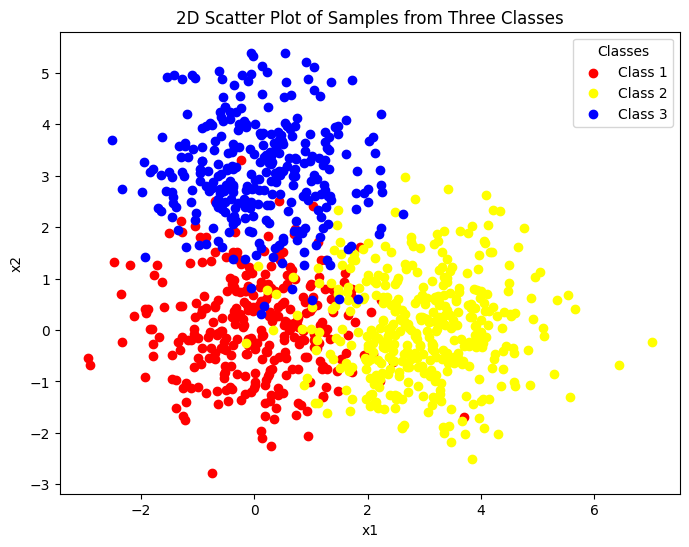

In [4]:

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c):
    plt.scatter(X[c == ck, 0], X[c == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()

We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model. 

### **Q6** Compute the posterior probabilities for this model.

Using Bayes formula, the posterior probability for a general class $c_{k}$ is:
$$
p(c_{k} | x) \, = \, \frac{p(c_{k})p(x | c_{k})}{p(x)}
$$
The model does not give us the explicit expression of $p(x)$, however we can write express it as:
$$
p(x) \, = \, \sum_{k} p(x,c_{k}) \, = \, \sum_{k} p(c_{k}) p(x | c_{k})
$$
where the sum over $c_{k}$ of the joint probability allows us to marginalize the classes random variable.

The overall expression becomes:
$$
p(c_{k} | x) \, = \, \frac{p(c_{k})p(x | c_{k})}{\sum_{k} p(c_{k}) p(x | c_{k})}
$$
Then we can subtitute the varius probability functions with the ones of the model given:
$$
p(c_{k} | x) \, = \, \frac{\pi_k \, \mathcal{N}(x|\mu_k, \Sigma_k)}{\sum_{k}\pi_k \, \mathcal{N}(x|\mu_k, \Sigma_k)}
$$

So, based on the previous questions, the Bayes estimator will try to maximize the posterior probability:
$$
\hat{c}(x) \, = \, \argmax_{k} \frac{\pi_k \, \mathcal{N}(x|\mu_k, \Sigma_k)}{\sum_{k'}\pi_{k'} \, \mathcal{N}(x|\mu_{k'}, \Sigma_{k'})}
$$

As $p(x)$ will be a constant, then we can drop it from consideration when computing the $\argmax$ and so the estimator as implemented in the subsequent questions is:
$$
\hat{c}(x) \, = \, \argmax_{k} \pi_k \, \mathcal{N}(x|\mu_k, \Sigma_k)
$$

### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

As stated above, we define the decision boundaries as the set of points where $p(c_{i}|x) = p(c_{j} | x)$

Thus for two generic classes $i$ and $j$ we can write:
$$
\frac{\pi_i \, \mathcal{N}(x|\mu_i, \Sigma_i)}{\sum_{k'}\pi_{k'} \, \mathcal{N}(x|\mu_{k'}, \Sigma_{k'})} \, = \, \frac{\pi_j \, \mathcal{N}(x|\mu_j, \Sigma_j)}{\sum_{k'}\pi_{k'} \, \mathcal{N}(x|\mu_{k'}, \Sigma_{k'})}
\\[5mm]
\pi_i \, \mathcal{N}(x|\mu_i, \Sigma_i) \, = \, \pi_j \, \mathcal{N}(x|\mu_j, \Sigma_j)
$$
where in the second equation we have removed the denominator as $x$ is given and it is a values such that $p(x) > 0$

Now we can substitute $\mathcal{N}(x|\mu_i, \Sigma_i)$ and $\mathcal{N}(x|\mu_j, \Sigma_j)$  with the expression of the multivariate normal distribution.
In the following I will start to use bold letters to indetify vectors and matrices
$$
\pi_i \cdot \frac{1}{\sqrt{(2\pi)^d \lvert \boldsymbol{\Sigma}_i \rvert}} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^\top \boldsymbol{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i) \right) \, = \, \pi_j \cdot \frac{1}{\sqrt{(2\pi)^d \lvert \boldsymbol{\Sigma}_j \rvert}} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_j)^\top \boldsymbol{\Sigma}_j^{-1} (\mathbf{x} - \boldsymbol{\mu}_j) \right)
$$

For the given model the matrix $\boldsymbol{\Sigma}$ is the identity matrix for all three classes, thus we can perform the following semplifications:
- $\lvert \boldsymbol{\Sigma} \rvert \, = \, 1$
- $\boldsymbol{\Sigma}^{-1} \, = \, \boldsymbol{\Sigma}$
- The identity matrix is the neutral term of the matrix multiplication

Moreover, $d = 2$ as $\mathbf{x}, \boldsymbol{\mu} \in \mathbb{R}^2$ and $\Sigma \in \mathbb{R}^{2x2}$

Plugging this semplifications in the equation we get:
$$
\pi_i \cdot \frac{1}{2\pi} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^\top (\mathbf{x} - \boldsymbol{\mu}_i) \right) \, = \, \pi_j \cdot \frac{1}{2\pi} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_j)^\top (\mathbf{x} - \boldsymbol{\mu}_j) \right)
\\[5mm]
\pi_i \cdot 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^\top (\mathbf{x} - \boldsymbol{\mu}_i) \right) \, = \, \pi_j \cdot
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_j)^\top (\mathbf{x} - \boldsymbol{\mu}_j) \right)
$$
Take the $ln$ of left and right side:
$$
-2ln(\pi_i) + (\mathbf{x} - \boldsymbol{\mu}_i)^\top (\mathbf{x} - \boldsymbol{\mu}_i) \, = \, -2ln(\pi_j) + \frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_j)^\top (\mathbf{x} - \boldsymbol{\mu}_j)
$$
Now we can expand the vector multiplication:
$$
-2ln(\pi_i) + \mathbf{x}^\top \mathbf{x} - \mathbf{x}^\top \boldsymbol{\mu}_i - \boldsymbol{\mu}_i^\top \mathbf{x} + \boldsymbol{\mu}_i^\top \boldsymbol{\mu}_i \, = \, -2ln(\pi_j) + \mathbf{x}^\top \mathbf{x} - \mathbf{x}^\top \boldsymbol{\mu}_j - \boldsymbol{\mu}_j^\top \mathbf{x} + \boldsymbol{\mu}_j^\top \boldsymbol{\mu}_j 
$$
Notice that $\|\mathbf{x}\|_2^2 = \mathbf{x}^\top \mathbf{x}$ and $\|\boldsymbol{\mu}\|_2^2 = \boldsymbol{\mu}^\top \boldsymbol{\mu}$. Furthermore, $\mathbf{x}^\top \boldsymbol{\mu} = \boldsymbol{\mu}^\top \mathbf{x}$

So, the equation becomes
$$
-2ln(\pi_i) + \|\mathbf{x}\|_2^2 - 2\boldsymbol{\mu}_i^\top \mathbf{x} + \|\boldsymbol{\mu_i}\|_2^2 \, = \, -2ln(\pi_j) + \|\mathbf{x}\|_2^2 - 2\boldsymbol{\mu}_j^\top \mathbf{x} + \|\boldsymbol{\mu}_j\|_2^2
\\[5mm]
2(\boldsymbol{\mu}_j - \boldsymbol{\mu}_i)^\top \mathbf{x} + \|\boldsymbol{\mu_i}\|_2^2 - \|\boldsymbol{\mu}_j\|_2^2 + 2ln(\frac{\pi_j}{\pi_i}) \, = \, 0
$$
The above equation, is the equation of an hyperplane in vector form. In this case, as $d=2$, it is the equation of a line.

The meaning of the result obtained is that the boundary between two classes $i$ and $j$, for the present model, is a line.

For the particular case of class 1 and 2, we can plug in the equation the values for the two classes and write:
$$
2(\boldsymbol{\mu}_2 - \boldsymbol{\mu}_1)^\top \mathbf{x} + \|\boldsymbol{\mu_1}\|_2^2 - \|\boldsymbol{\mu}_2\|_2^2 + 2ln(\frac{\pi_2}{\pi_1}) \, = \, 0
$$
The coefficients are:
- $(\boldsymbol{\mu}_2 - \boldsymbol{\mu}_1)^\top \, = \, [3, \,0]$ 
- $\|\boldsymbol{\mu_1}\|_2^2 - \| \, = \, 0$, $\|\boldsymbol{\mu}_2\|_2^2 \, = \, 9$
- $2ln(\frac{\pi_2}{\pi_1}) \, = \, 2ln(\frac{0.4}{0.3}) \, = \, 0.57$

And the line equation reduces to a straight line:
$$
2[3, \,0] \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - 9 + 0.57 \, = \, 6x_1 - 8.43 \, = \, 0
\\[5mm]
x_1 \, = \, 1.405
$$


### **Q7B** Plot the optimal decision boundary for this model using the above calcultations. 


In [5]:
# def decision_boundary_class_1_2(mean_1, mean_2, pi_1, pi_2):
#     x1 = np.linspace(0, 2, 1000000)
#     x2 = np.linspace(-2, 4)
#     tolerance = 1e-5
    
#     x1_expanded = 2 * x1[:, None] * (mean_2[0] - mean_1[0]) 
#     x2_expanded = 2 * x2[None, :] * (mean_2[1] - mean_1[1])
#     result = x1_expanded + x2_expanded  
#     # f = 2*x1*(mean_2[0] - mean_1[0]) + 2*x2*(mean_2[1] - mean_1[1])
#     # constant = np.array([np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) for _ in range(len(f))])
    
#     # indexes = np.where(f == constant)[0]
#     constant = np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) + 2*np.log(pi_1 / pi_2)
#     # print(constant)
#     # print(x1)
#     matches = np.where(np.abs(result - constant) < tolerance) 
#     return x1[matches[0]], x2[matches[1]]

In [6]:
def sample_x(k, mean_vector, covariance_vector, n_samples):
    return multivariate_normal.rvs(mean_vector[k-1], covariance_vector[k-1], size=n_samples)

In [7]:
# def decision_boundary(samples, mean_1, mean_2, cov_1, cov_2, pi_1, pi_2):
#     tolerance = 1e-8
#     equal_x1 = np.ones(len(samples)) * np.finfo(np.float32).max
#     equal_x2 = np.ones(len(samples)) * np.finfo(np.float32).max
#     for i in range(len(samples)):
#         x1 = samples[i][0]
#         for j in range(len(samples)):
#             x2 = samples[j][1]
#             point = np.array([x1, x2])
#             pdf_1 = pi_1 * multivariate_normal.pdf(point, mean=mean_1, cov=cov_1)
#             pdf_2 = pi_2 * multivariate_normal.pdf(point, mean=mean_2, cov=cov_2)
#             if(np.abs(pdf_1 - pdf_2) < tolerance):
#                 #print(f"{pdf_1}, {pdf_2}")
#                 equal_x1[i] = point[0]
#                 equal_x2[j] = point[1]
    
#     idxs_1 = np.where(equal_x1 != np.finfo(np.float32).max)[0]
#     idxs_2 = np.where(equal_x2 != np.finfo(np.float32).max)[0]
#     return x1[idxs_1], x2[idxs_2]
            

    

To plot the boundaries, I write a function to solve the line equation found in the derivation above

In [8]:
def decision_boundary(mean_1, mean_2, pi_1, pi_2):
    
    q = np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) + 2*np.log(pi_1/pi_2)
    a = mean_2[0] - mean_1[0]
    b = mean_2[1] - mean_1[1]
    if a == 0:
        x2 = np.ones(100) * q / (2*b)
        x1 = np.linspace(-3, 7, 100)
        return x1, x2
    if b == 0:
        x1 = np.ones(100) * q / (2*a)
        x2 = np.linspace(-3, 7, 100)
        return x1, x2
    x1 = np.linspace(-3, 7)
    x2 = ((q/2) - a*x1) / b
    return x1, x2
    
   

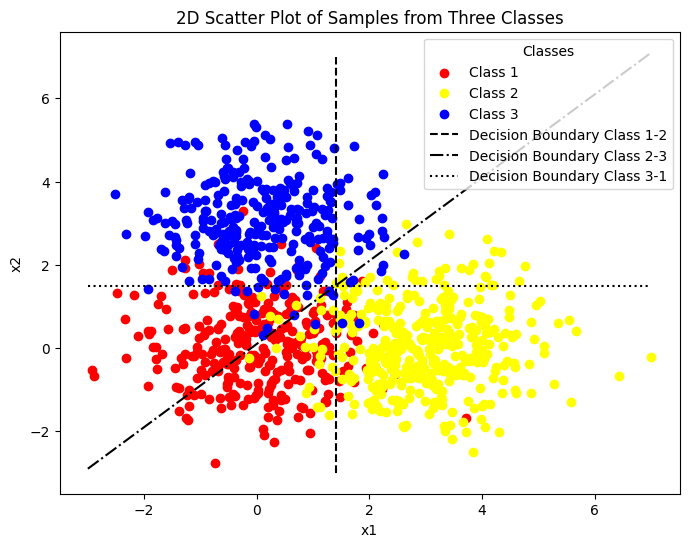

In [9]:
# samples_c1 = sample_x(1, mean_vector, covariance_vector, 100)
# samples_c2 = sample_x(2, mean_vector, covariance_vector, 100)
# samples_c3 = sample_x(3, mean_vector, covariance_vector, 100)


plt.figure(figsize=(8, 6))
boundary = 1.595
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c):
    plt.scatter(X[c == ck, 0], X[c == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
# plt.axvline(x=boundary, linestyle='--', color='black', label='Decision Boundary Class 1-2')
linestyles = ['--', '-.', 'dotted']
for i in range(3):
    x1, x2 = decision_boundary( mean_vector[i], mean_vector[(i+1)%3], pi_vector[i], pi_vector[(i+1)%3])
    plt.plot(x1, x2, linestyle=linestyles[i], color='black', label=f'Decision Boundary Class {i+1}-{(i+1)%3+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()



### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


In [10]:
# Boundary class 1-2
x1, _ = decision_boundary( mean_vector[0], mean_vector[1], pi_vector[0], pi_vector[1])
bound_1 = x1[0]

# Boundary class 1-3
_, x2 = decision_boundary( mean_vector[0], mean_vector[2], pi_vector[0], pi_vector[2])
bound_2 = x2[0]

# Boundary class 2-3
x1, x2 = decision_boundary( mean_vector[1], mean_vector[2], pi_vector[1], pi_vector[2])
bound_3 = x2

def classify(x, bound_1, bound_2, bound_3):
    if(x[0] >= bound_1 and x[1] <= bound_2):
        return 2
    if(x[0] <= bound_1 and x[1] >= bound_2):
        return 3
    
    if(x[0] > bound_1 and x[1] > bound_2):
        if(np.all(np.full(len(bound_3), x[1]))):
            return 3
        else:
            return 2
    if (x[0] < bound_1 and x[1] < bound_2):
        if(np.all(np.full(len(bound_3), x[1]))):
            return 3
        else:
            return 1

c_hat = np.zeros(len(X))
for i,x in enumerate(X):  
    c_hat[i] = classify(x, bound_1, bound_2, bound_3) - 1
    
error_rate = np.sum(c_hat != c)/len(c)
print(f"The misclaffication rate is {error_rate}")

The misclaffication rate is 0.37


In [11]:
def bayes_classifier(x, mean_vector, covariance_vector, pi_vector):
    
    all_posteriors = np.zeros(3)
    for i in range(3):
        all_posteriors[i] = pi_vector[i] * multivariate_normal.pdf(x, mean_vector[i], covariance_vector[i])
        
    return np.argmax(all_posteriors)

c_hat = np.zeros(len(X))
for i,x in enumerate(X):
    c_hat[i] = bayes_classifier(x, mean_vector, covariance_vector, pi_vector)

error_rate = np.sum(c_hat != c)/len(c)
print(f"The misclaffication rate is {error_rate}")


The misclaffication rate is 0.093


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$


### **Q9** What is the decision boundary between class 1 and class 2 in this case?


In [12]:
np.linalg.inv(np.eye(2) + np.fliplr(np.eye(2))*0.5)

array([[ 1.33333333, -0.66666667],
       [-0.66666667,  1.33333333]])

We can restate the same scenario of question 7A and have again the equation:
$$
\pi_i \cdot \frac{1}{\sqrt{(2\pi)^d \lvert \boldsymbol{\Sigma}_i \rvert}} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^\top \boldsymbol{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i) \right) \, = \, \pi_j \cdot \frac{1}{\sqrt{(2\pi)^d \lvert \boldsymbol{\Sigma}_j \rvert}} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_j)^\top \boldsymbol{\Sigma}_j^{-1} (\mathbf{x} - \boldsymbol{\mu}_j) \right)
$$
Again, $d = 2$ but the covariances are not all identity matrices, so we need to keep them.
Then we can carry out some calculations:
$$
\frac{\pi_i}{\sqrt{\lvert \boldsymbol{\Sigma}_i \rvert}} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^\top \boldsymbol{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i) \right) \, = \, \frac{\pi_j }{\sqrt{(\lvert \boldsymbol{\Sigma}_j \rvert}} 
\exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_j)^\top \boldsymbol{\Sigma}_j^{-1} (\mathbf{x} - \boldsymbol{\mu}_j) \right)
\\[5mm]
-2ln\left(\frac{\pi_i}{\sqrt{\lvert \boldsymbol{\Sigma}_i \rvert}}\right) +
(\mathbf{x} - \boldsymbol{\mu}_i)^\top \boldsymbol{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i) \, = \, -2ln\left(\frac{\pi_j }{\sqrt{(\lvert \boldsymbol{\Sigma}_j \rvert}}\right)
(\mathbf{x} - \boldsymbol{\mu}_j)^\top \boldsymbol{\Sigma}_j^{-1} (\mathbf{x} - \boldsymbol{\mu}_j)
\\[5mm]
-2ln\left(\frac{\pi_i}{\sqrt{\lvert \boldsymbol{\Sigma}_i \rvert}}\right) + \mathbf{x}^\top\boldsymbol{\Sigma}_i^{-1}\mathbf{x} - \mathbf{x}^\top\boldsymbol{\Sigma}_i^{-1}\boldsymbol{\mu}_i - \boldsymbol{\mu}_i^\top\boldsymbol{\Sigma}_i^{-1} \mathbf{x} + \boldsymbol{\mu}_i^\top\boldsymbol{\Sigma}_i^{-1}\boldsymbol{\mu}_i \, = \,
\\[5mm] 
= \, -2ln\left(\frac{\pi_j}{\sqrt{\lvert \boldsymbol{\Sigma}_j \rvert}}\right) + \mathbf{x}^\top\boldsymbol{\Sigma}_j^{-1}\mathbf{x} - \mathbf{x}^\top\boldsymbol{\Sigma}_j^{-1}\boldsymbol{\mu}_j - \boldsymbol{\mu}_j^\top\boldsymbol{\Sigma}_j^{-1} \mathbf{x} + \boldsymbol{\mu}_j^\top\boldsymbol{\Sigma}_j^{-1}\boldsymbol{\mu}_j
$$

All covariance matrices of the model are symmtric, thus their inverse is also symmetric. In that case it holds

$$\mathbf{x}^\top\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu} \, = \, \boldsymbol{\mu}^\top\boldsymbol{\Sigma}^{-1} \mathbf{x}$$

And so we can write:
$$
-2ln\left(\frac{\pi_i}{\sqrt{\lvert \boldsymbol{\Sigma}_i \rvert}}\right) +
\mathbf{x}^\top\boldsymbol{\Sigma}_i^{-1}\mathbf{x} - 2\,\boldsymbol{\mu}_i^\top\boldsymbol{\Sigma}_i^{-1} \mathbf{x} + \boldsymbol{\mu}_i^\top\boldsymbol{\Sigma}_i^{-1}\boldsymbol{\mu}_i \, = \,
\\[5mm]
= \, -2ln\left(\frac{\pi_j}{\sqrt{\lvert \boldsymbol{\Sigma}_j \rvert}}\right) +
\mathbf{x}^\top\boldsymbol{\Sigma}_j^{-1}\mathbf{x} - 2\,\boldsymbol{\mu}_j^\top\boldsymbol{\Sigma}_j^{-1} \mathbf{x} + \boldsymbol{\mu}_j^\top\boldsymbol{\Sigma}_j^{-1}\boldsymbol{\mu}_j 
\\[5mm]
\mathbf{x}^\top(\boldsymbol{\Sigma}_i^{-1} - \boldsymbol{\Sigma}_j^{-1})\mathbf{x} - 
2\,(\boldsymbol{\mu}_i^\top\boldsymbol{\Sigma}_i^{-1} - \boldsymbol{\mu}_j^\top\boldsymbol{\Sigma}_j^{-1})\mathbf{x} + \boldsymbol{\mu}_i^\top\boldsymbol{\Sigma}_i^{-1}\boldsymbol{\mu}_i - \boldsymbol{\mu}_j^\top\boldsymbol{\Sigma}_j^{-1}\boldsymbol{\mu}_j + 2ln\left(\frac{\pi_j \, \sqrt{\lvert \boldsymbol{\Sigma}_i \rvert}}{\pi_i\,\sqrt{\lvert \boldsymbol{\Sigma}_j \rvert}}\right) \, = \, 0
$$
The above equation is the equation of a conic in vector form. For our particular case, it is a conic in the 2D plane.

This means that, for this new model, the decision boundaries between classes are conic curves.

To compute the boundary between classes 1 and 2 we can substitute the right coefficients.
- $\boldsymbol{\Sigma}_1^{-1} \, = \, \mathbf{I}$, $\boldsymbol{\Sigma}_2^{-1} \, = \, \frac{1}{2}\mathbf{I}$
- $\boldsymbol{\Sigma}_1^{-1} - \boldsymbol{\Sigma}_2^{-1} \, = \, \frac{1}{2}\mathbf{I}$ 
- $\boldsymbol{\mu}_1^\top\boldsymbol{\Sigma}_1^{-1} \, = \, \boldsymbol{\mu}_1^\top \, = \, \mathbf{0}$
- $\boldsymbol{\mu}_2^\top\boldsymbol{\Sigma}_2^{-1} \, = \, \frac{1}{2}\,\boldsymbol{\mu}_2^\top \, = \, [\frac{3}{2}, 0]$
- $\boldsymbol{\mu}_1^\top\boldsymbol{\Sigma}_1^{-1}\boldsymbol{\mu}_1 \, = \, 0$
- $\boldsymbol{\mu}_2^\top\boldsymbol{\Sigma}_2^{-1}\boldsymbol{\mu}_2 \, = \, \frac{9}{2}$
- $2ln\left(\frac{\pi_2 \, \sqrt{\lvert \boldsymbol{\Sigma}_1 \rvert}}{\pi_1\,\sqrt{\lvert \boldsymbol{\Sigma}_2 \rvert}}\right) \, = \, -0.81$

The conic equation is then:
$$
\frac{1}{2}\,\mathbf{x}^\top\mathbf{x} + 2[\frac{3}{2}, 0]\mathbf{x} - \frac{9}{2} - 0.81 \, = \, 0
\\[5mm]
\mathbf{x}^\top\mathbf{x} + [6, 0]\mathbf{x} \, = \, 10.62
$$
In scalar form it becomes:
$$
x_1^2 + x_2^2 + 6x_1 \, = \, 10.62
$$
If we complete the square we get
$$
x_1^2 + x_2^2 + 6x_1 + 9 - 9 \, = \, 10.62
\\[5mm]
(x_1 + 3)^2 + x_2^2 + 9 \, = \, 18.62 
$$
The decision boundary between classes 1 and 2 is the equation of circle with center $[-3,\,0]$ and radius $\sqrt{18.62}$

### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



Using the calculation done at question 9, I write directly the expression of the boundary for class 1 and 2

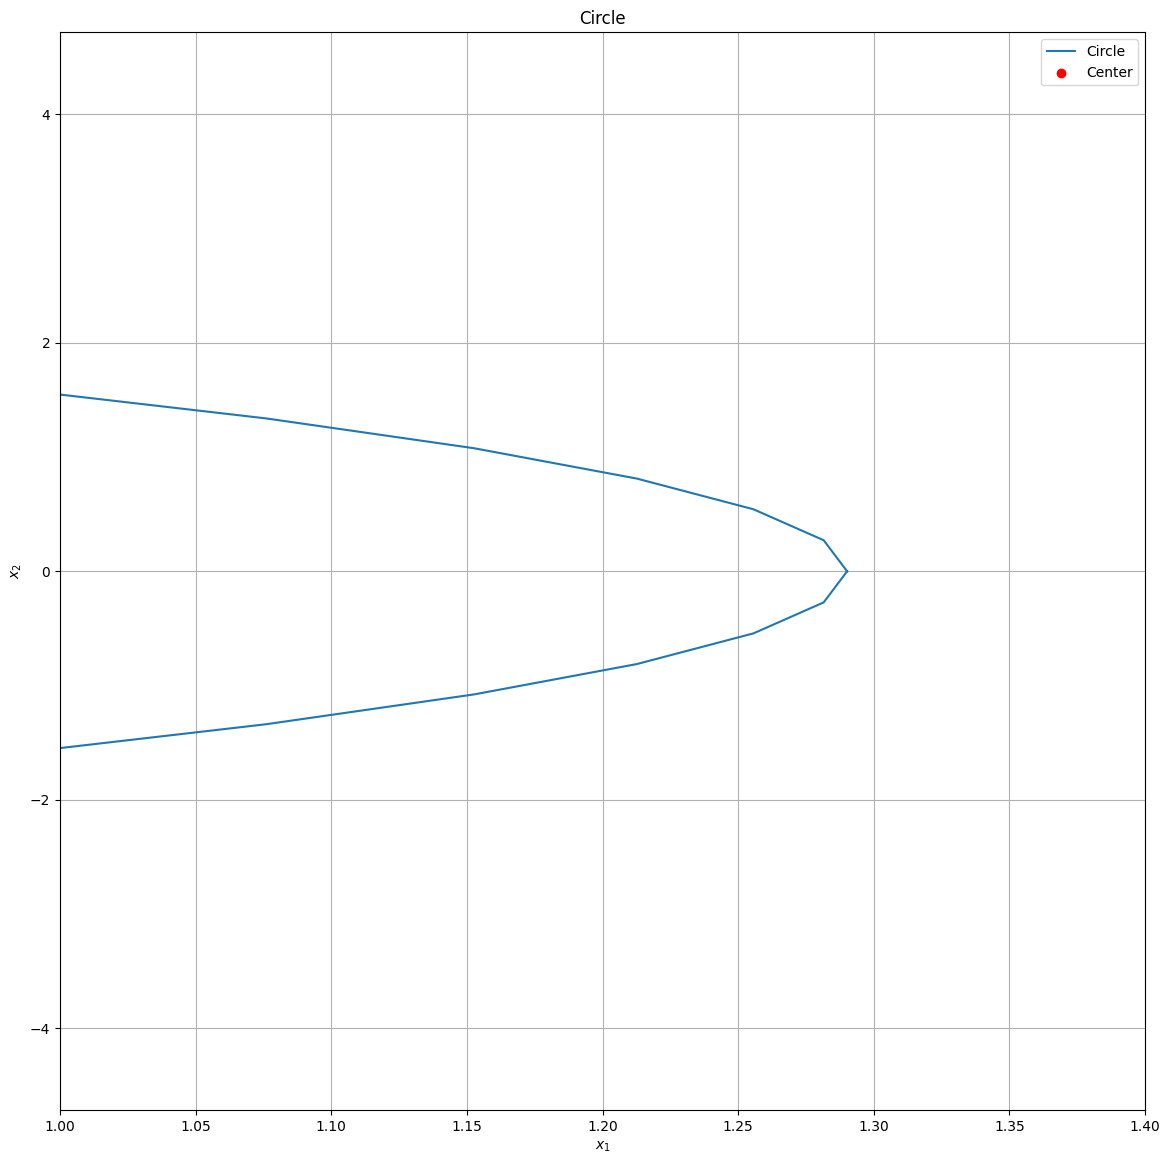

In [45]:

radius = np.sqrt(18 + np.log(2 * pi_vector[0] / pi_vector[1]))
center = (-3, 0)
theta = np.linspace(0, np.pi*2, 100)
x1 = center[0] + radius * np.cos(theta)
x2 = center[1] + radius * np.sin(theta)

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 14))
plt.plot(x1, x2, label="Circle")
plt.scatter(center[0], center[1], color='red', label="Center")
plt.title("Circle")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(1,1.4)
plt.legend()
plt.grid()
plt.show()


### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them. 

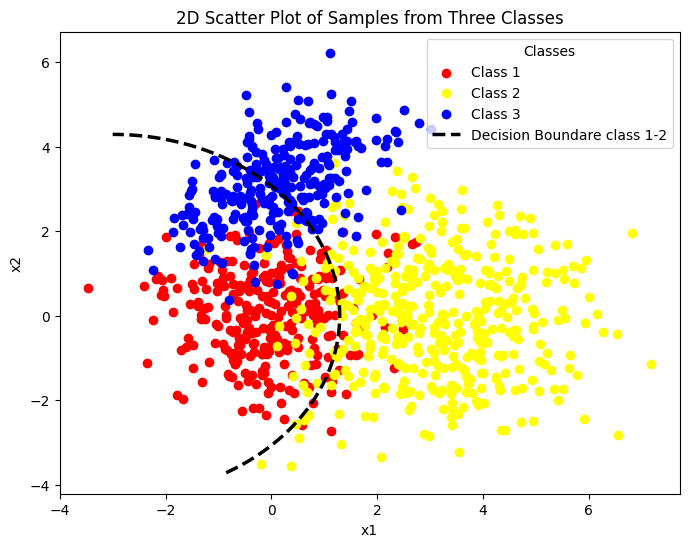

In [25]:
covariance_vector_m2 = covariance_vector
covariance_vector_m2[1] = 2*np.eye(2)
covariance_vector_m2[2] = np.eye(2) + np.fliplr(np.eye(2))*0.5

X_m2, c_m2 = sample_x_c(pi_vector, mean_vector, covariance_vector_m2, 1000)

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c_m2):
    plt.scatter(X_m2[c_m2 == ck, 0], X_m2[c_m2 == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
plt.plot(x1, x2, linestyle='--', linewidth = '2.5', color='black', label="Decision Boundare class 1-2")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()

If we want to plot also the other boundaries. The general result of the equation above for the model i the generic conic function

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_7664\298479744.py:24: UserWarning: The following kwargs were not used by contour: 'linestyle'
  plt.contour(X1, X2, Z, levels=[0], colors='black', linestyle= linestyles[i])
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_7664\298479744.py:27: UserWarning: The following kwargs were not used by contour: 'linestyle', 'label'
  plt.contour(X1, X2, Z, levels=[0], colors='black', linestyle= linestyles[i], label=f'Bondary Class {i%3}-{(i%3)+1}')


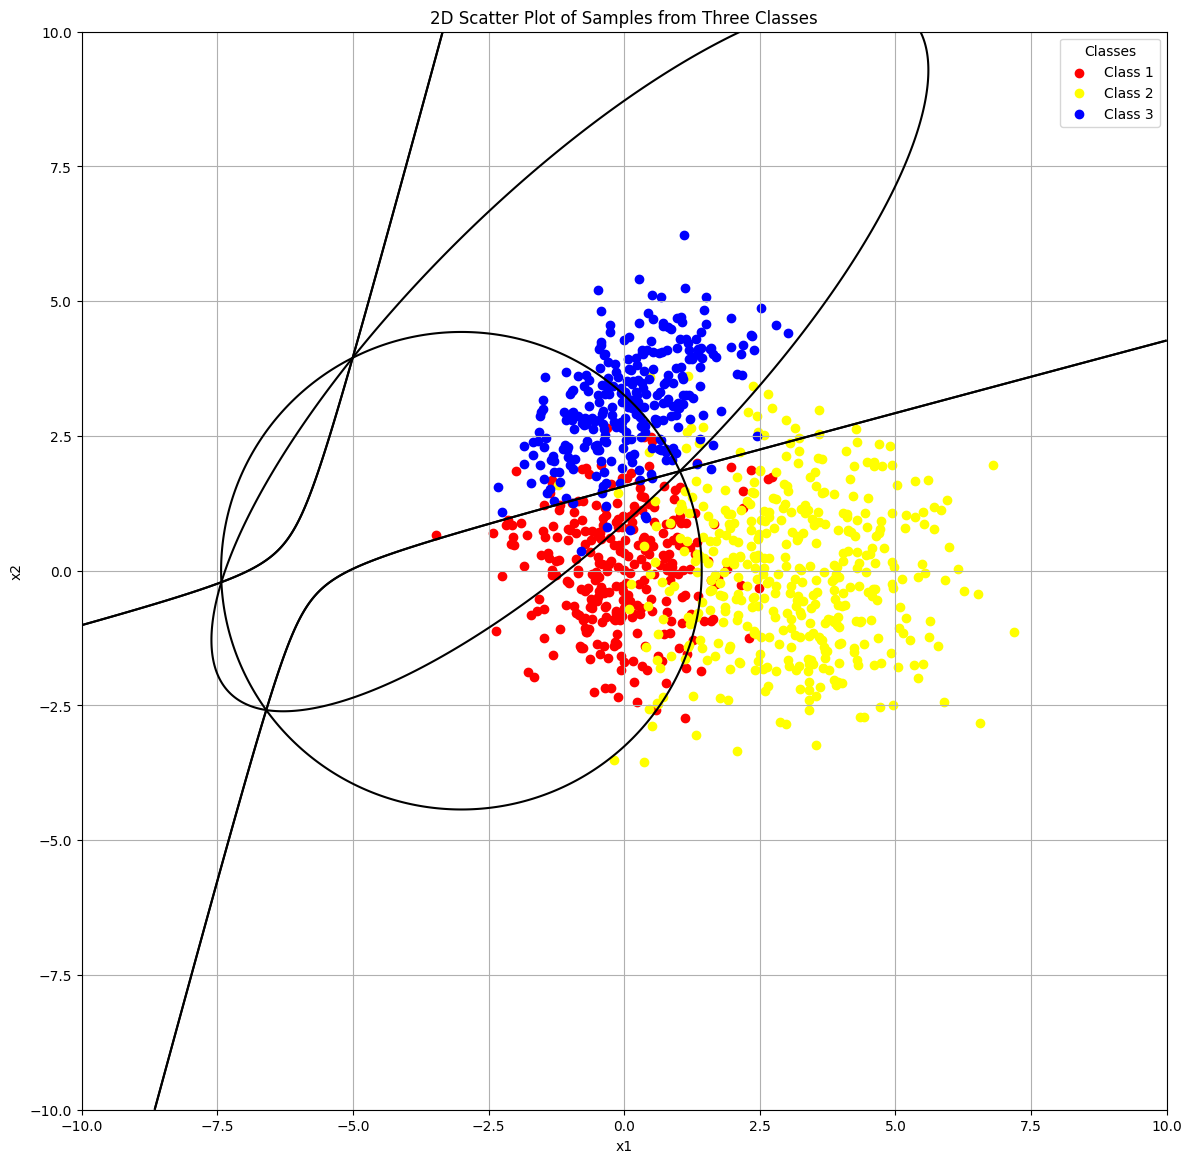

In [46]:
from numpy.linalg import  inv, det
x1 = np.linspace(-10, 10, 1000)
x2 = np.linspace(-10, 10, 1000)
X1, X2 = np.meshgrid(x1, x2)

# Generic conic: Ax^{2}+Bxy+Cy^{2}+Dx+Ey+F=0
def generic_conic(mean_1, mean_2, cov_1, cov_2, pi_1, pi_2, X1, X2):
    A = (inv(cov_1) - inv(cov_2))[0][0]
    B = (inv(cov_1) - inv(cov_2))[0][1]
    C = A   # Diagonal matrices
    D = -2 * (mean_1.T @ inv(cov_1) - mean_2 @ inv(cov_2))[0]
    E = -2 * (mean_1.T @ inv(cov_1) - mean_2 @ inv(cov_2))[1]
    F = +2 * np.log(pi_1*np.sqrt(det(cov_2)) / (pi_2 * np.sqrt(det(cov_1)))) + mean_2.T @ inv(cov_2) @ mean_2 - mean_1.T @ inv(cov_1) @ mean_1 
    return A*X1**2 + 2*B*X1*X2 + C*X2**2 + D*X1 + E*X2 - F


plt.figure(figsize=(14, 14))
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c_m2):
    plt.scatter(X_m2[c_m2 == ck, 0], X_m2[c_m2 == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
linestyles = ['--', '-.', 'dotted']
Z = generic_conic(mean_vector[0], mean_vector[2], covariance_vector_m2[0], covariance_vector_m2[2], pi_vector[0], pi_vector[2], X1, X2)
plt.contour(X1, X2, Z, levels=[0], colors='black', linestyle= linestyles[i])
for i in range(3):
    Z = generic_conic(mean_vector[(i)], mean_vector[(i+1)%3], covariance_vector_m2[i], covariance_vector_m2[(i+1)%3], pi_vector[i], pi_vector[(i+1)%3], X1, X2)
    plt.contour(X1, X2, Z, levels=[0], colors='black', linestyle= linestyles[i], label=f'Bondary Class {i%3}-{(i%3)+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.grid()
plt.show()
plt.show()

### **Q12** Compute the error of the Bayes classifier on this dataset.

The Bayes classifier optimizes the posterior probability

In [47]:

c_hat = np.zeros(len(X_m2))
for i,x in enumerate(X_m2):
    c_hat[i] = bayes_classifier(x, mean_vector, covariance_vector_m2, pi_vector)

error_rate = np.sum(c_hat != c_m2)/len(c_m2)
print(f"The misclaffication rate is {error_rate}")
    
    

The misclaffication rate is 0.108
